# Dimenson Reduction

In [1]:
file_path = '../../QuickStart/Data/Electricity/residential_all.pkl'
import sys
sys.path.append('..')
from utils import *

In [2]:
x = gen_array(file_path)

### Load Data

In [2]:
import glob
import numpy as np
import pandas as pd

from tqdm import tqdm

In [3]:
file_path = '../../QuickStart/Data/Electricity/residential_all.pkl'

df = pd.read_pickle(file_path)

In [4]:
val = df['consumption'].values
ids = df['ID'].values

val_reshape = []

for i in tqdm(range(3639)):
    val_reshape.append(val[i*25728: (i+1)*25728])

val_reshape = np.array(val_reshape)
#np.save('numpy_all', val_reshape)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3639/3639 [00:00<00:00, 928975.79it/s]


## Preprocessing - Smoothing

## Feature Extraction and Dimension Reduction

### No Dimension Reduction


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=14, random_state=0).fit(x)

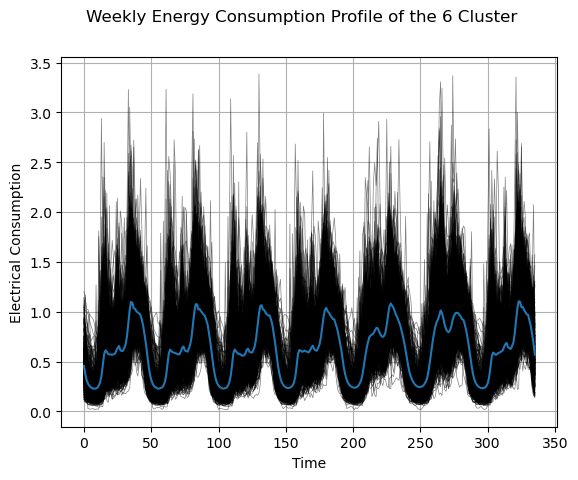

In [5]:
from utils import plot_cluster
plot_cluster(x, kmeans.predict(x), cluster_id=5, period='week')

/home/DelvigneV/miniconda3/envs/trail/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/DelvigneV/miniconda3/envs/trail/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


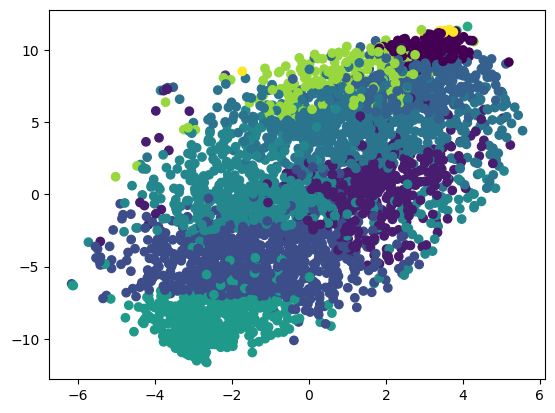

In [5]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1).fit_transform(x)

plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.predict(x))

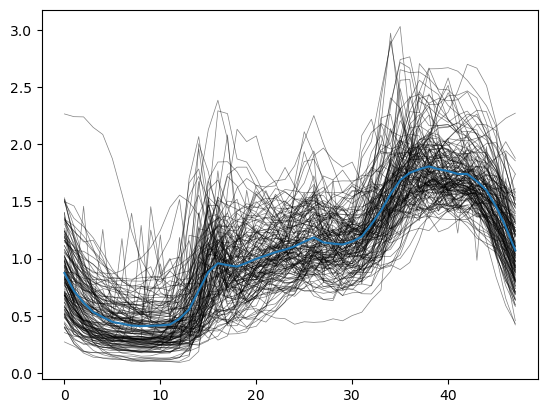

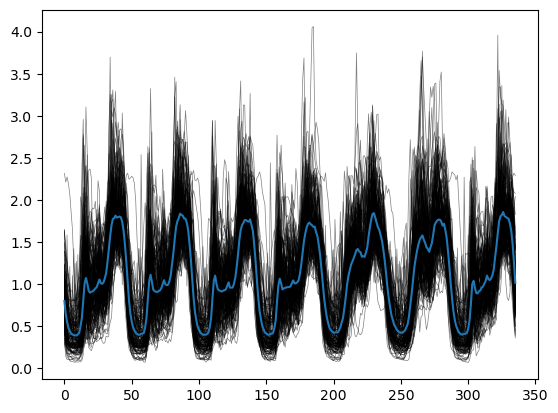

In [6]:
fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0), c='black', linewidth=0.5, alpha=0.5)
plt.plot(val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48).mean(1).mean(0))

fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j][:, :7*48*76].reshape(n_belongs, -1, 7, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0).flatten(), c='black', linewidth=0.5, alpha=0.5)
plt.plot(tmp.mean(1).mean(0).flatten())

### Principal Component Analysis (PCA)

Text(0, 0.5, '1 - Explained Variance Ratio')

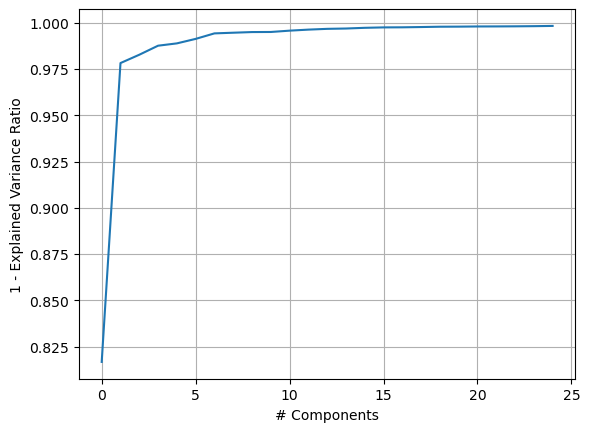

In [7]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)

pca.fit(val_reshape)
plt.plot(1-pca.explained_variance_ratio_[:25])
plt.grid()

plt.xlabel('# Components')
plt.ylabel('1 - Explained Variance Ratio')

In [8]:
pca = PCA(n_components=10)

x_pca = pca.fit_transform(val_reshape)

In [9]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(x_pca)

In [10]:
kmeans.predict(x_pca)

array([ 6, 12,  0, ..., 13,  3,  6], dtype=int32)

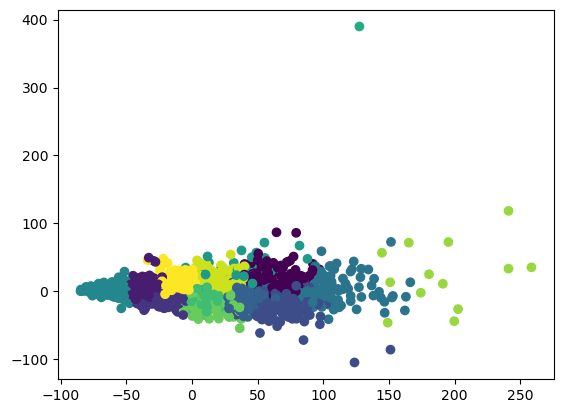

In [11]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.predict(x_pca))

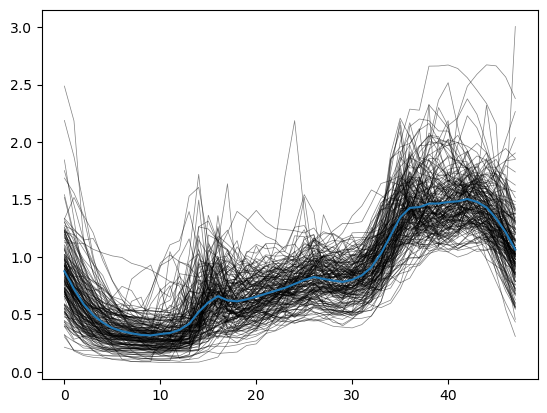

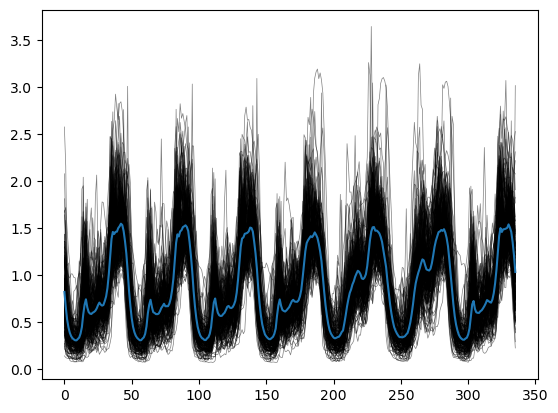

In [12]:
x = x_pca
fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0), c='black', linewidth=0.5, alpha=0.5)
plt.plot(val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48).mean(1).mean(0))

fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j][:, :7*48*76].reshape(n_belongs, -1, 7, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0).flatten(), c='black', linewidth=0.5, alpha=0.5)
plt.plot(tmp.mean(1).mean(0).flatten())

### Multidimensional Scaling (MDS)

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.manifold import MDS

mds = MDS(n_components=14, n_jobs=-1, verbose=2)
x_mds = mds.fit_transform(val_reshape)

In [125]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=14, random_state=0).fit(x_mds)

In [126]:
kmeans.predict(x_mds)

array([12,  5,  9, ...,  1,  0, 12], dtype=int32)

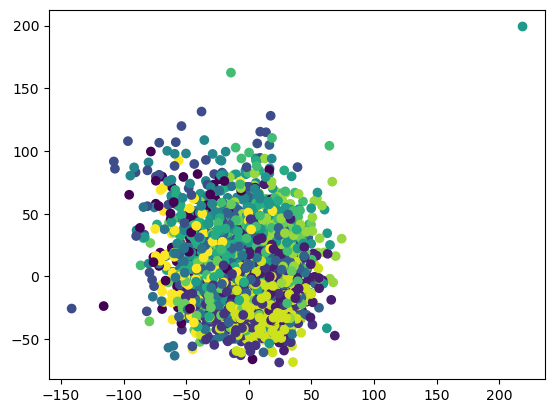

In [16]:
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=kmeans.predict(x_mds))

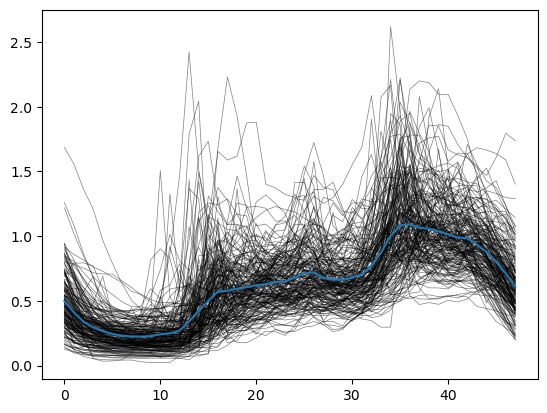

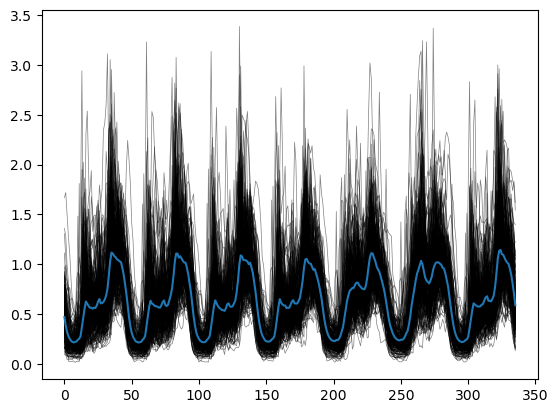

In [128]:
x = x_mds
fig = plt.figure()
j = 5
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0), c='black', linewidth=0.5, alpha=0.5)
plt.plot(val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48).mean(1).mean(0))

fig = plt.figure()
j = 5
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j][:, :7*48*76].reshape(n_belongs, -1, 7, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0).flatten(), c='black', linewidth=0.5, alpha=0.5)
plt.plot(tmp.mean(1).mean(0).flatten())

### Fast Fourier Transform

In [36]:
from scipy.fft import fft

x_fft = np.abs(fft(val_reshape, n=100))

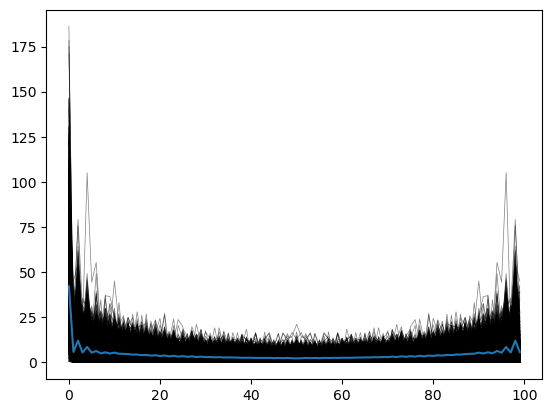

In [43]:
fig = plt.figure()
plt.plot(np.transpose(x_fft), c='black', linewidth=0.5, alpha=0.5)
plt.plot(x_fft.mean(0))

plt.show()

In [44]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(x_fft)

array([13,  1,  5, ...,  8,  2, 11], dtype=int32)

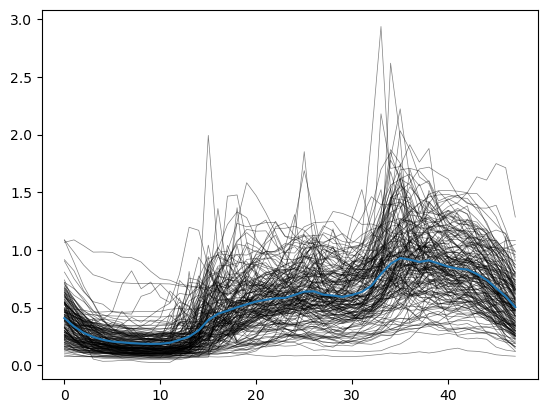

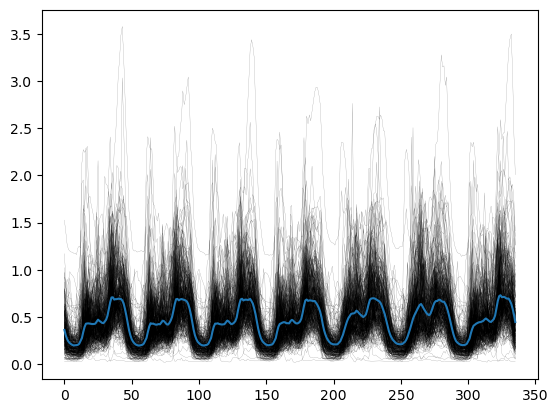

In [47]:
x = x_fft
fig = plt.figure()
j = 3
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0), c='black', linewidth=0.5, alpha=0.5)
plt.plot(val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48).mean(1).mean(0))

fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j][:, :7*48*76].reshape(n_belongs, -1, 7, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0).flatten(), c='black', linewidth=0.15, alpha=0.5)
plt.plot(tmp.mean(1).mean(0).flatten())

### Wavelet Transform

In [105]:
from scipy import signal

dwt = []

for i in tqdm(range(len(val_reshape))):
    sig = val_reshape[:, :7*48*76].reshape(val_reshape.shape[0], -1, 7, 48).mean(1)[i].flatten()
    widths = np.arange(1, 25)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)[:, ::2]
    dwt.append(cwtmatr)
dwt = np.asarray(dwt)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3639/3639 [02:50<00:00, 21.28it/s]


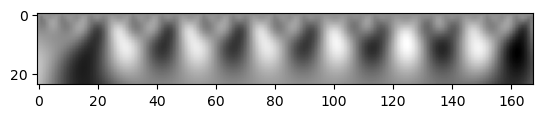

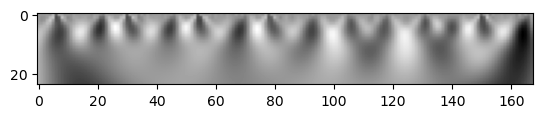

In [116]:
fig = plt.figure()

plt.imshow(dwt.mean(0), cmap='binary')

fig = plt.figure()

plt.imshow(dwt[np.random.randint(0, len(val_reshape))], cmap='binary')

x_dwt = dwt.reshape(len(dwt), -1)

In [117]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(x_dwt)

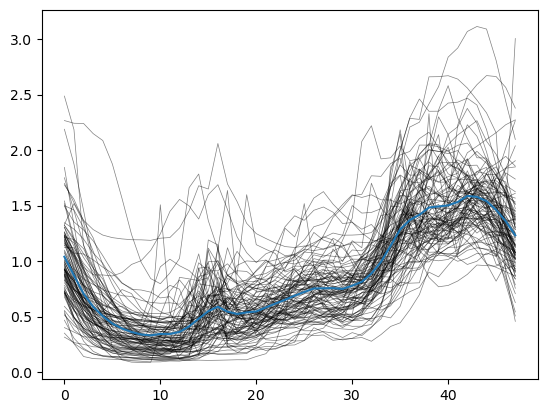

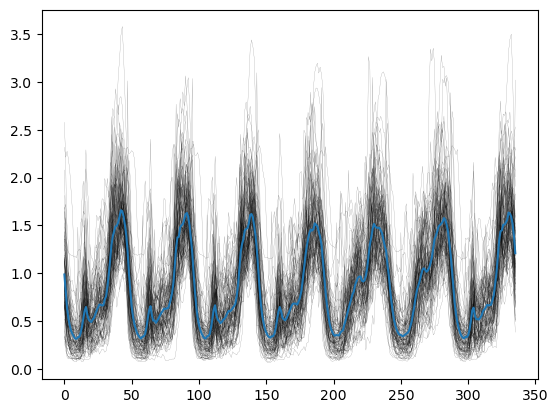

In [121]:
x = x_dwt
fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0), c='black', linewidth=0.5, alpha=0.5)
plt.plot(val_reshape[kmeans.predict(x)==j].reshape(n_belongs, -1, 48).mean(1).mean(0))

fig = plt.figure()
j = 0
n_belongs = (kmeans.predict(x)==j).sum()
tmp = val_reshape[kmeans.predict(x)==j][:, :7*48*76].reshape(n_belongs, -1, 7, 48)
for i in range(n_belongs):
    plt.plot(tmp[i].mean(0).flatten(), c='black', linewidth=0.15, alpha=0.5)
plt.plot(tmp.mean(1).mean(0).flatten())

### Piecewise Constant Approximation

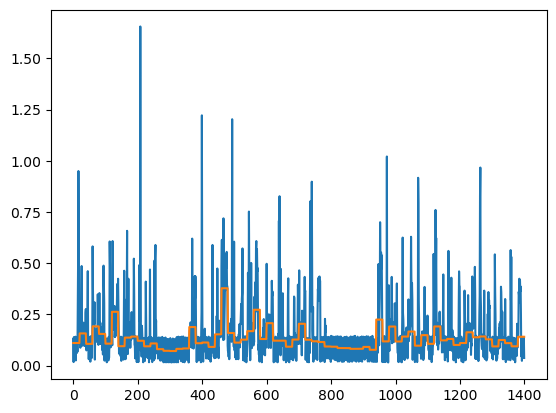

In [30]:
def piecewise_approx(sig, window=20, overlapping=True):
    sig_apca = []
    for t in range(len(sig)//window):
        for w in range(window):
            #sig_apca.append(sig[t*window:(t+1)*window].mean())
            sig_apca.append(np.median(sig[t*window:(t+1)*window]))
    return np.asarray(sig_apca)

'''
for i in tqdm(range(len(val_reshape))):
    sig = val_reshape[:, :7*48*76].reshape(val_reshape.shape[0], -1, 7, 48).mean(1)[i].flatten()
    widths = np.arange(1, 25)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)[:, ::2]
    dwt.append(cwtmatr)
'''

sig = val_reshape[0]
sig_apca = piecewise_approx(sig)

import matplotlib.pyplot as plt 

plt.plot(sig[100:1500])
plt.plot(sig_apca[100:1500])